# PART 1
**!!! Ne pas relancer cette partie du code, utiliser le csv "new_train_labels.csv" (PART 2) !!!**

import pandas as pd
import numpy as np

# Load the train_label
CSV_PATH = './IPEO_Planet_project/train_labels.csv'
df = pd.read_csv(CSV_PATH, sep = ';')
df.fillna(value=0, inplace = True)
df.head()

# Create DataFrame containing the labels only
df_drop_train = df.drop('image_name', axis=1)

# Get all the unique labels present in dataset
df_concat = pd.concat([df_drop_train[col] for col in df_drop_train])
label = df_concat.unique()

# Add the label 'image_name'
# Drop the label 0 (corresponding to NaN value in orginial train_label csv)
# Reorder the labels to get athmospheric labels first, ground labels ('agriculture') after
label = label[(label!=0) & (label!='agriculture')]
label = np.insert(label, 0, 'image_name')
label = np.insert(label, 5, 'agriculture')

# Create a Pandas DataFrame with columns corresponding to labels
df_label = pd.DataFrame(columns=label)

# Fill the DataFrame df_label with image_name corresponding to orginial dataframe (df_na)
# Fill with 1 if the label is present in a given row
df_na = pd.read_csv(CSV_PATH, sep = ';')
for index in df_na.index:
    # Add new empty new row in df_label
    df_label = df_label.append(pd.Series(dtype='object'), ignore_index=True)
    
    # Get all the non-nan values of originial df_na
    index_values = df_na.loc[index].dropna().values
    
    # Add the image_name
    index_image_name = index_values[0]
    df_label.image_name[index] = index_image_name
    
    index_labels = index_values[1:]
    for labels in index_labels:
        df_label[labels][index] = 1   

df_label.head()

# Fill NaN values with 0
# Set image_name as index
df_label = df_label.fillna(0)
df_label.set_index(df_label.image_name, inplace = True)
df_label.drop(columns='image_name', inplace =True)

# Save DataFrame as csv file
NEW_PATH = './IPEO_Planet_project/new_train_labels.csv'
df_label.to_csv(path_or_buf=NEW_PATH, sep=',')

# PART 2

In [ ]:
import os
import numpy as np
from skimage.io import imsave, imread
import matplotlib as plt
import pandas as pd

,haze,clear,cloudy,partly_cloudy,agriculture,conventional_mine,bare_ground,artisinal_mine,blooming,blow_down,cultivation,habitation,water,primary,road,selective_logging,slash_burn
0,2697,28431,2089,7261,12315,100,862,339,332,98,4477,3660,7411,37513,8071,340,209


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space

In [ ]:
# Load the train_label
CSV_PATH = './CSV/new_train_labels.csv'
train_label = pd.read_csv(CSV_PATH)
label_sum = pd.DataFrame(columns = train_label.drop('image_name',axis=1).columns)
label_sum = label_sum.append(train_label.drop('image_name', axis=1).sum(), ignore_index = True)
label_sum

In [ ]:
rare_label_list = list()
for labels_name in label_sum.columns:
  if label_sum[labels_name].iloc[0] < 1000:
    rare_label_list.append([label_sum[labels_name].iloc[0], labels_name])
rare_label_list.sort()
rare_label_list = np.array(rare_label_list)
rare_label_list[:,1]

In [ ]:
all_index_rare = list(train_label[train_label[rare_label_list[:,1]].sum(axis=1)>0].index)
all_index_not_rare = list(set(train_label.index) - set(all_index_rare))
list_final = []

for rare in rare_label_list[:,1]:
  tempo_list = []
  for i in reversed(all_index_rare):
    if train_label[rare].loc[i] == 1:
      all_index_rare.remove(i)
      tempo_list.append(i)
  list_final.append(tempo_list)
list_final.append(all_index_not_rare)

In [ ]:
import pickle
with open('./List_label_rare/list_label_rare.npy', "wb") as fp:
  pickle.dump(list_final, fp)

# Part 3
Loading image as numpy matrix
- ! Don't rerun this part (+4h of loading, already exists)

import os
import numpy as np
from skimage.io import imsave, imread
import matplotlib as plt

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space
#!git checkout Test_Louis
#!git pull

IMAGE_PATH = '../IPEO_Planet_project/train-jpg'

# Create numpy matrix representing image
numpy_image = np.ndarray(shape=(256,256,3,0))

for i in os.listdir(IMAGE_PATH):
  #obtain the index of the current image file (example : '0-999')
  index = i.split("_")[1]

  # Example : '../IPEO_Planet_project/train-jpg/train_0-999'
  train_tuple = os.path.join(IMAGE_PATH,i)

  for j in os.listdir(train_tuple):
    # Example : '../IPEO_Planet_project/train-jpg/train_0-999/train_1.jpg'
    image_directories = os.path.join(train_tuple, j)
    image_array = imread(image_directories)
    image_array = np.reshape(image_array, (256,256,3,1))
    numpy_image = np.concatenate((numpy_image, image_array), axis = 3)

  np.save(file = os.path.join(train_tuple, f"numpy_ndarray_{index}.npy"), arr = numpy_image)

  # Empty the ndarray to fill it with new image
  numpy_image = np.empty(shape=(256,256,3,0))

# Part 4
- Creating the graphs

In [1]:
import os
import numpy as np
from skimage.io import imsave, imread
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs

/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs


In [4]:
# Load the logs
LOG_PATH = './our_version_loss_with_weights/metrics_new.csv'
log_df = pd.read_csv(LOG_PATH, sep=';')

In [5]:
log_df.head()

,val_loss,val_accuracy,hamming_dist,epoch,step,train_loss
0,0.000224,0.882828,0.117172,0,189,0.000258
1,0.000199,0.883789,0.116211,1,379,0.000200
2,0.000227,0.884274,0.115726,2,569,0.000194
3,0.000185,0.888862,0.111138,3,759,0.000191
4,0.000204,0.885642,0.114359,4,949,0.000189


In [6]:
log_df.index = log_df.epoch

In [7]:
log_df.drop(columns=['epoch'], inplace=True)

In [8]:
log_df.shape

(50, 5)

Text(0.5, 0, 'Epoch')

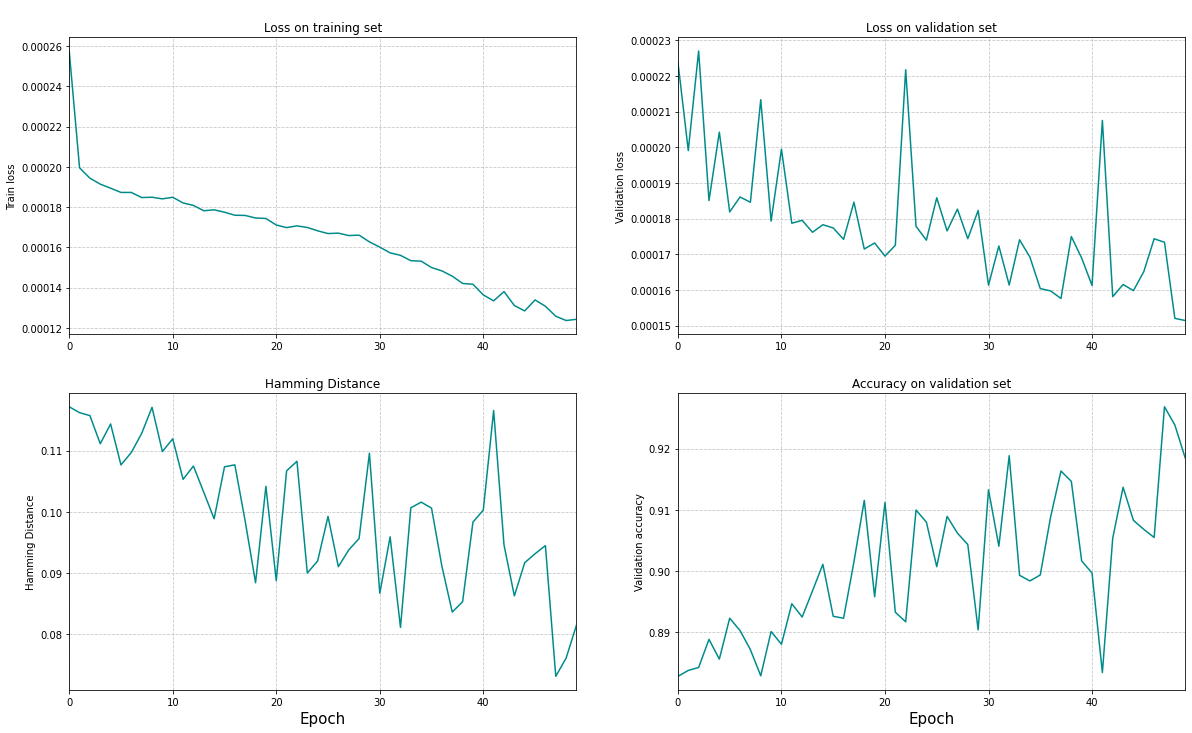

In [9]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1)
ax3 = fig.add_subplot(223, sharex=ax1)
ax4 = fig.add_subplot(224, sharex=ax1)
axs = [ax1,ax2,ax3,ax4]
values = [log_df.train_loss, log_df.val_loss, log_df.hamming_dist, log_df.val_accuracy]

for i in range(4):
  axs[i].set_xlim([0,49])
  axs[i].grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.7)
  axs[i].plot(log_df.index, values[i], color='darkcyan')

ax1.set_title("\nLoss on training set")
ax2.set_title("\nLoss on validation set")
ax3.set_title("\nHamming Distance")
ax4.set_title("\nAccuracy on validation set")

ax1.set_ylabel("Train loss")
ax2.set_ylabel("Validation loss")
ax3.set_ylabel("Hamming Distance")
ax4.set_ylabel("Validation accuracy")

ax3.set_xlabel("Epoch", fontsize=15)
ax4.set_xlabel("Epoch", fontsize=15)

In [ ]:
fig.savefig('/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs/courbe.png')

(Text(0, 0.5, 'Validation accuracy'),
 Text(0.5, 1.0, 'Accuracy of model on validation set\n'))

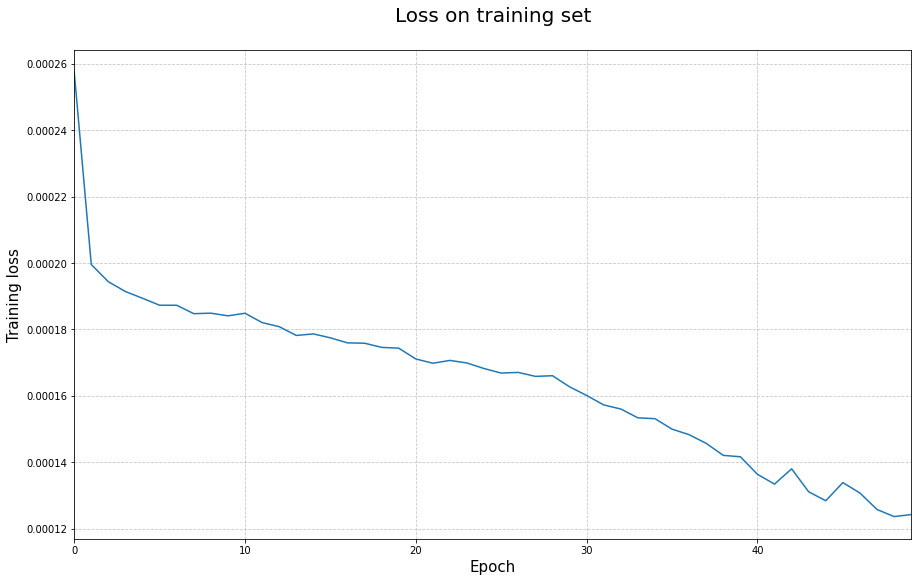

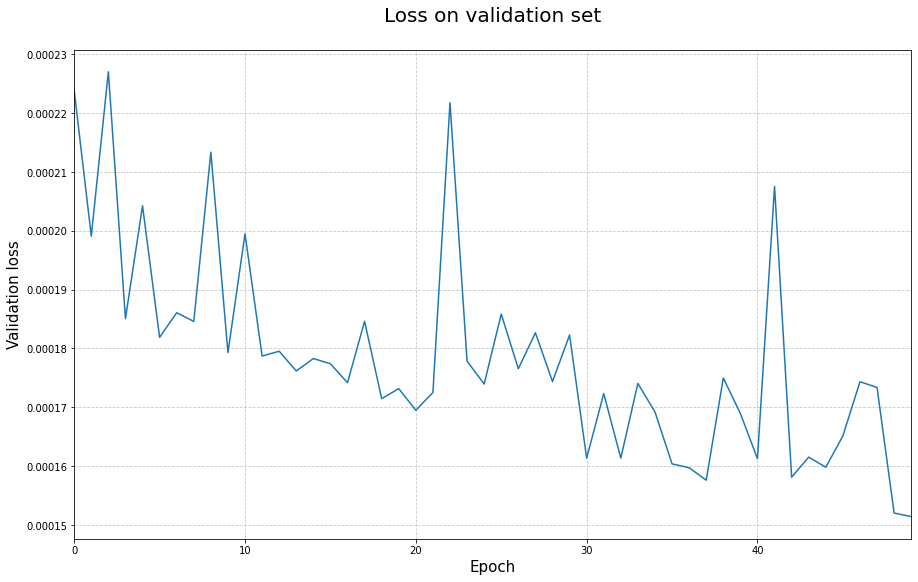

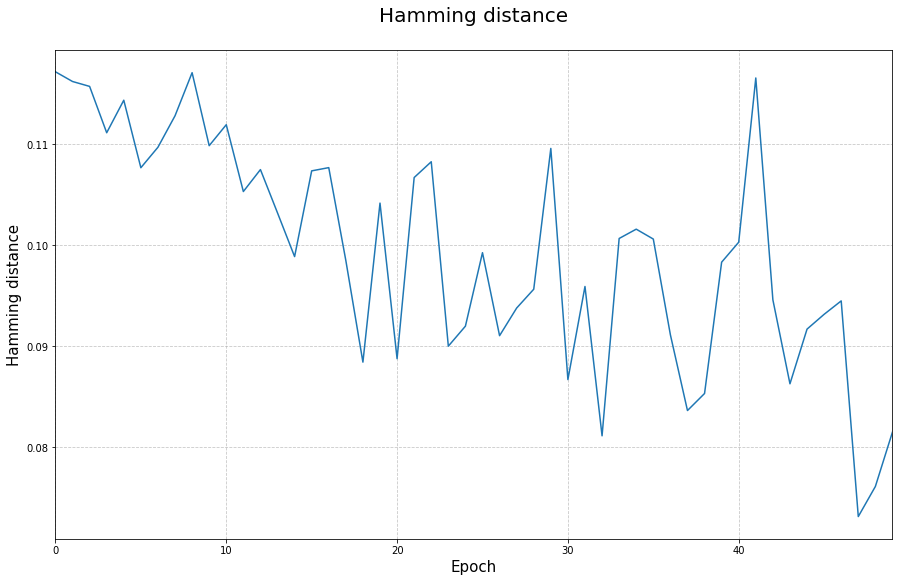

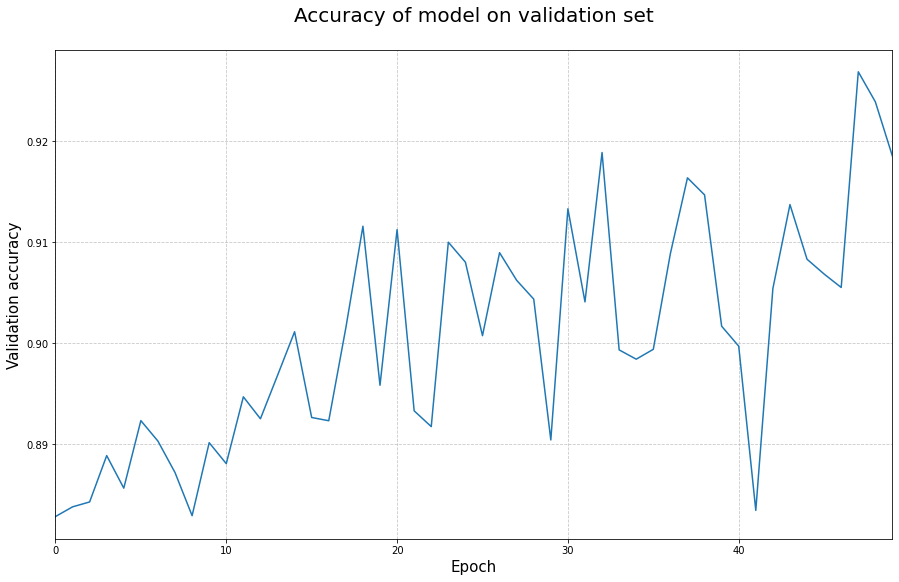

In [23]:
fig1,fig2,fig3,fig4 = plt.figure(figsize=(15,9)),plt.figure(figsize=(15,9)),plt.figure(figsize=(15,9)),plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)
ax4 = fig4.add_subplot(111)
axs = [ax1,ax2,ax3,ax4]
figs = [fig1,fig2,fig3,fig4]
values = [log_df.train_loss, log_df.val_loss, log_df.hamming_dist, log_df.val_accuracy]

for i in range(4):
  axs[i].set_xlim([0,49])
  axs[i].grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.7)
  axs[i].plot(log_df.index, values[i])
  axs[i].set_xlabel('Epoch', fontsize=15)

ax1.set_ylabel('Training loss', fontsize=15), ax1.set_title('Loss on training set\n', fontsize=20)

ax2.set_ylabel('Validation loss', fontsize=15), ax2.set_title('Loss on validation set\n', fontsize=20)

ax3.set_ylabel('Hamming distance', fontsize=15), ax3.set_title('Hamming distance\n', fontsize=20)

ax4.set_ylabel('Validation accuracy', fontsize=15), ax4.set_title('Accuracy of model on validation set\n', fontsize=20)

In [20]:
fig1.savefig('/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs/train_loss.png')
fig2.savefig('/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs/val_loss.png')
fig3.savefig('/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs/hamming_dist.png')
fig4.savefig('/content/drive/MyDrive/Colab_Notebooks/Observation_Earth/IPEO-Understanding-the-Amazon-from-Space/logs/val_accuracy.png')